In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn import cross_validation, neighbors
from sklearn.preprocessing import StandardScaler
from math import sqrt
import warnings
from collections import Counter 

In [22]:
%matplotlib notebook
style.use('Solarize_Light2')

In [23]:
df = pd.read_csv(r'c:\Users\15764\Documents\Datasets\breast-cancer_wnsconsin\breast-cancer-wisconsin.csv',index_col=0)
df.replace('?',-99999,inplace=True)
df.head(2)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2


In [24]:
X = np.array(df.drop(['Class'],1))
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
Y =np.array(df['Class'])

C:\Users\15764\AppData\Local\Continuum\anaconda2\envs\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y, test_size=0.2) ; X_train

array([[-0.14846494, -0.69999505, -0.40657446, ..., -0.5900668 ,
        -0.61182504, -0.34391178],
       [-1.2146669 , -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 1.983939  ,  0.93973866,  0.2668747 , ...,  2.28276589,
         2.33759359, -0.34391178],
       ...,
       [ 1.983939  ,  1.59563215,  2.28722218, ..., -0.17966213,
        -0.61182504,  4.9074208 ],
       [-1.2146669 , -0.69999505, -0.74329904, ..., -0.5900668 ,
        -0.61182504, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.5900668 ,
        -0.61182504, -0.34391178]])

In [26]:
clf = neighbors.KNeighborsClassifier()

In [27]:
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
accuracy = clf.score(X_test,Y_test) ; accuracy

0.9142857142857143

In [29]:
example_measure = np.array([[4,1,1,2,2,3,4,3,2], [4,2,5,3,2,3,5,7,1]], dtype='float64')
example_measure = example_measure.reshape(2,-1) 
example_measure = scaler.transform(example_measure)

In [30]:
cat = clf.predict(example_measure) ; cat

array([2, 2], dtype=int64)

In [31]:
#----manualy

In [32]:
plot1 = (1,3)
plot2 = (2,5)

In [33]:
E_distance= sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 ) ; E_distance

2.23606797749979

In [34]:
new_point = (30,10)
dataset = {'k': ((2,4),(3,4),(2,6),(20,6),(30,8),(20,10),(24,8)), 'r': ((35,8),(55,12),(51,14),(52,13),(40,10),(40,12))} ; dataset

{'k': ((2, 4), (3, 4), (2, 6), (20, 6), (30, 8), (20, 10), (24, 8)),
 'r': ((35, 8), (55, 12), (51, 14), (52, 13), (40, 10), (40, 12))}

<IPython.core.display.Javascript object>


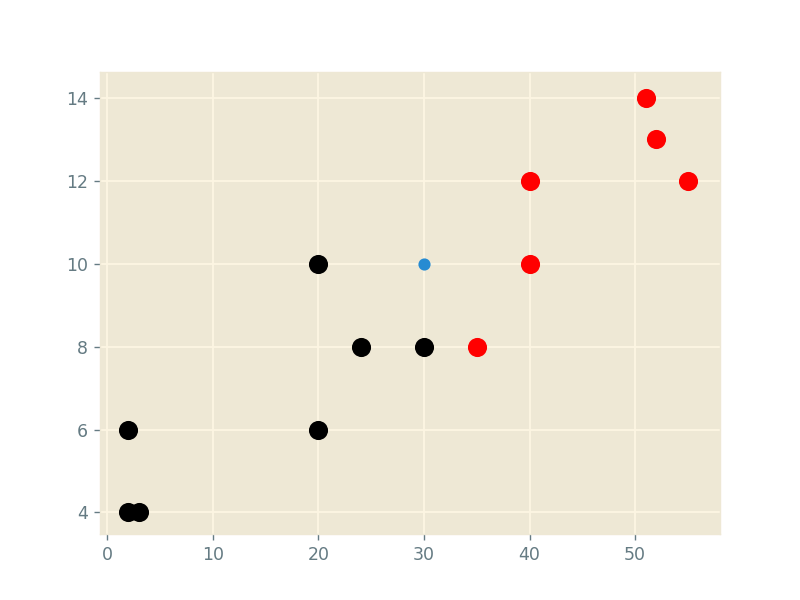

In [35]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,c=i)
plt.scatter(new_point[0],new_point[1])

In [36]:
def k_ner_neigh(data,predict,k=3):
    if len(data)>=k: 
        warnings.warn('K is set to a value less than total voting groups')
    dictance = []
    for group in data:
        for features in data[group]:
            ed= np.linalg.norm(np.array(features) - np.array(predict))
            dictance.append([ed,group]) 
    votes = [i[1] for i in sorted(dictance) [:k]]
    vote_res =Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_res , confidence

In [37]:
k_ner_neigh(dataset,new_point,3)

('k', 0.6666666666666666)

In [38]:
import random

In [39]:
full_data = df.astype(float).values.tolist() 
random.shuffle(full_data) 

In [40]:
test_size = int(len(full_data) * 0.2)
train_set = {2: [], 4:[]}
test_set =train_set.copy() 

In [41]:
test_data = full_data[-test_size:]
train_data = full_data[:-test_size]

In [42]:
[train_set[i[-1]].append(i[:-1]) for i in train_data] 
[test_set[i[-1]].append(i[:-1]) for i in test_data] ; test_set

{2: [[4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 3.0, 1.0, 2.0, -99999.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 4.0, 4.0, 4.0, 6.0, 5.0, 7.0, 3.0, 1.0],
  [5.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [8.0, 3.0, 3.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0],
  [6.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0,

In [43]:
from pdb import set_trace

In [44]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        #set_trace()
        vote, conf = k_ner_neigh(train_set,data, k =5)
        if vote == group:
            correct +=1
        else:
            print(conf)
        total +=1


0.6
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.6
0.6
0.8
0.6
0.6
0.6
0.8
0.8
0.6
0.6


In [45]:
print(correct/total)

0.9742489270386266
